In [37]:
import warnings
warnings.filterwarnings("ignore")


In [38]:
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
!pip install category_encoders
import category_encoders as ce


In [40]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform


In [42]:
data=pd.read_csv("/content/Titanic-Dataset.csv")

In [43]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [44]:
# Step: Normalize column names (safe access)
data.columns = data.columns.str.strip().str.lower()

# ➤ Fill numerical columns with *median*
num_cols = ['age', 'fare']
for col in num_cols:
    if col in data.columns:
        data[col].fillna(data[col].median(), inplace=True)

# ➤ Fill categorical columns with *mode*
cat_cols = ['embarked']
for col in cat_cols:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
data.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


In [48]:
# Cabin is the most columns has NAN Values
data.cabin.value_counts()

,count
cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [49]:
columns = [col for col in data.columns]

for col in columns:
    print("\n",data[col].value_counts(),"\n")


 passengerid
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64 


 survived
0    549
1    342
Name: count, dtype: int64 


 pclass
3    491
1    216
2    184
Name: count, dtype: int64 


 name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 


 sex
male      577
female    314
Name: count, dty

In [50]:
columns = [col for col in data.columns if data[col].dtype == 'object']

for col in columns:
    print("\n",data[col].value_counts(),"\n")


 name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 


 sex
male      577
female    314
Name: count, dtype: int64 


 ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count,

In [51]:
data.duplicated().sum()

np.int64(0)

In [52]:
columns = [col for col in data.columns if data[col].dtype != 'object']

for col in columns:
    print("\n",col,data[col].skew().sum(),"\n")


 passengerid 0.0 


 survived 0.4785234382949897 


 pclass -0.6305479068752845 


 age 0.5102446555756495 


 sibsp 3.6953517271630565 


 parch 2.7491170471010933 


 fare 4.787316519674893 



In [53]:
# Fill missing numerical columns with median
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

# Fill missing categorical columns with mode
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [54]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"--- {model_name} ---")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()


**Visualization**

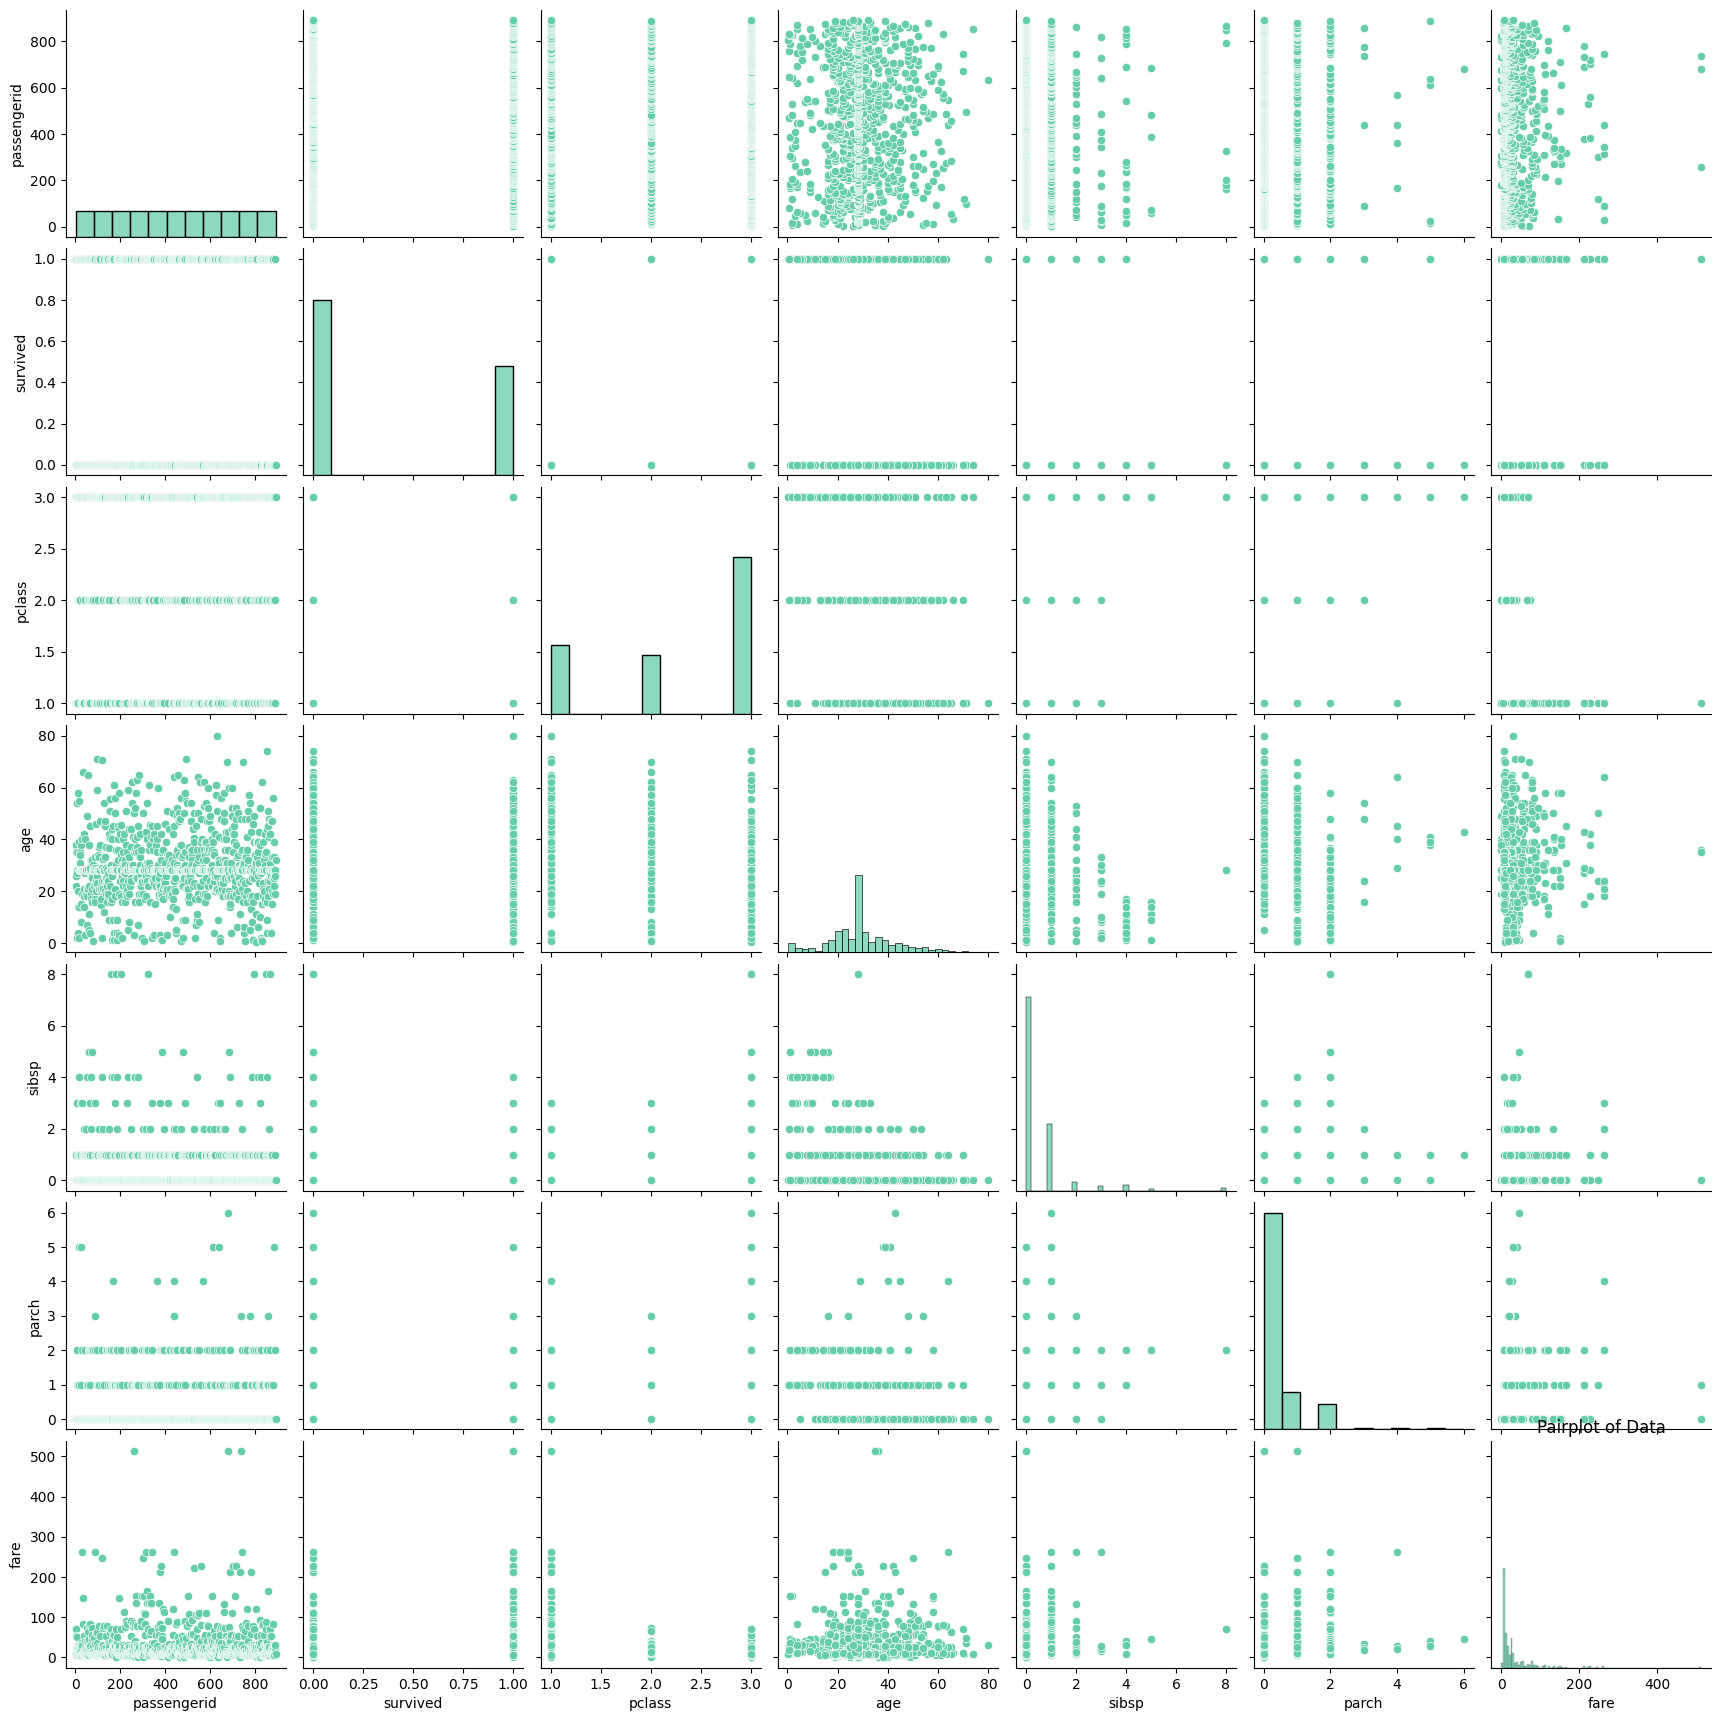

In [55]:
sns.pairplot(data)
plt.title('Pairplot of Data')
plt.show()

In [56]:
from sklearn.metrics import roc_curve, auc

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"--- {model_name} ---")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

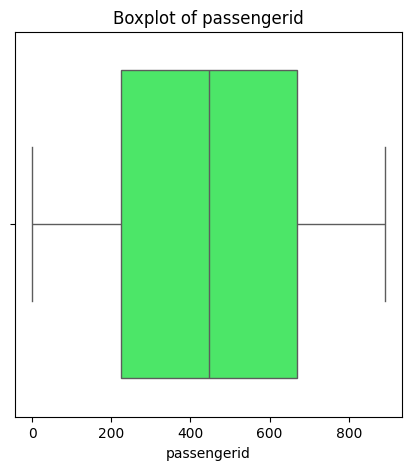

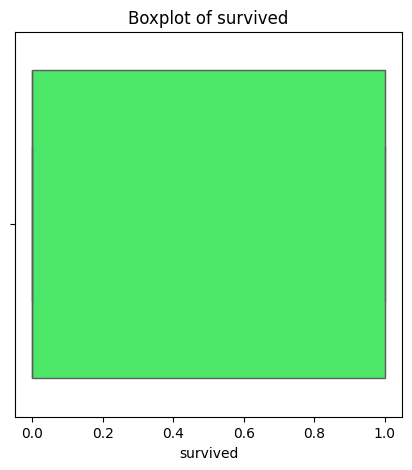

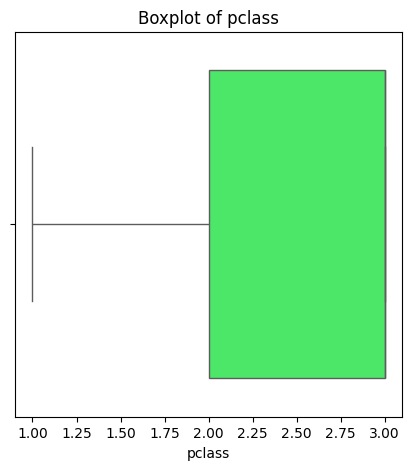

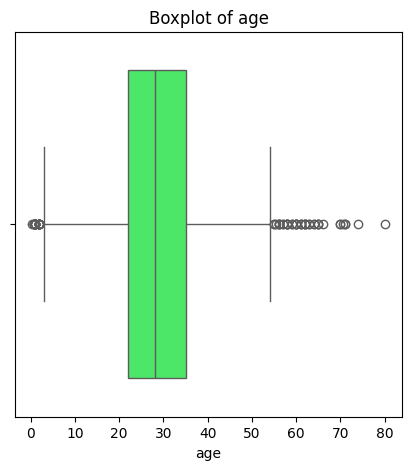

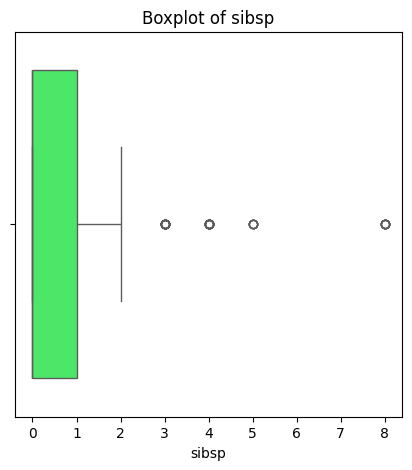

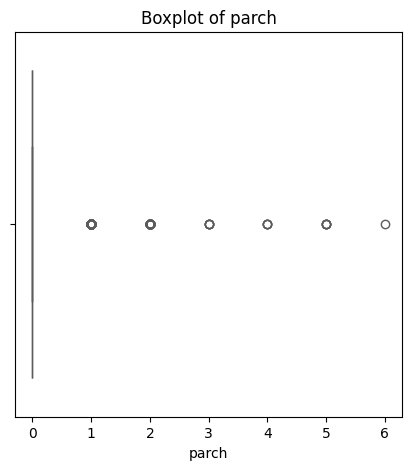

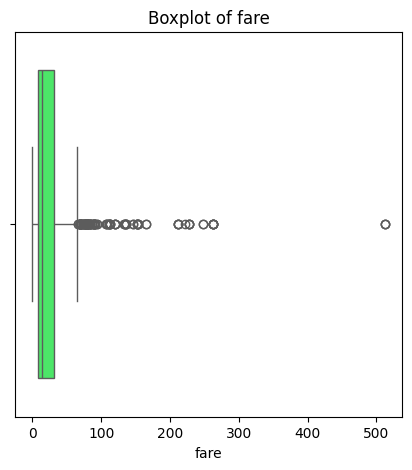

In [57]:
custom_palette = ["#33FF57"]

# To show the outliers of each column
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'Boxplot of {col}')
    bp = sns.boxplot(data=data, x=col, ax=ax, palette=custom_palette)
    plt.show()
    plt.close(fig)

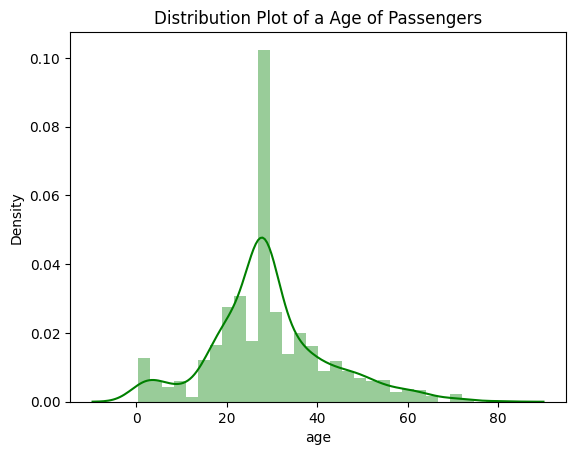

In [58]:
sns.distplot(data['age'], kde=True, bins=30, color='green')
plt.title('Distribution Plot of a Age of Passengers')
plt.show()

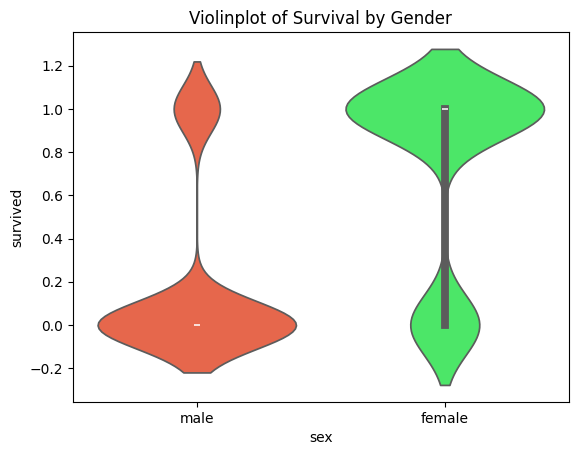

In [59]:
custom_palette = ["#FF5733", "#33FF57"]
sns.violinplot(x='sex', y='survived', data=data,palette=custom_palette)
plt.title('Violinplot of Survival by Gender')
plt.show()

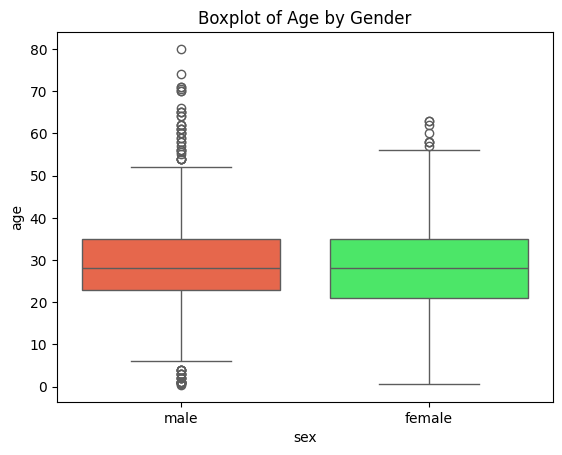

In [60]:
custom_palette = ["#FF5733", "#33FF57"]
sns.boxplot(x='sex', y='age', data=data, palette=custom_palette)
plt.title('Boxplot of Age by Gender')
plt.show()

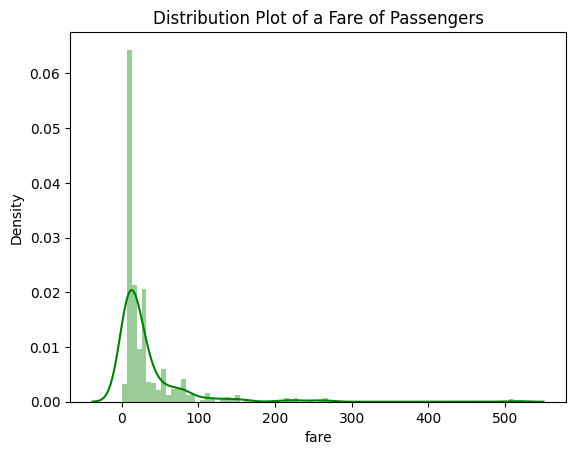

In [61]:
sns.distplot(data['fare'], kde=True, bins=80, color='green')
plt.title('Distribution Plot of a Fare of Passengers')
plt.show()

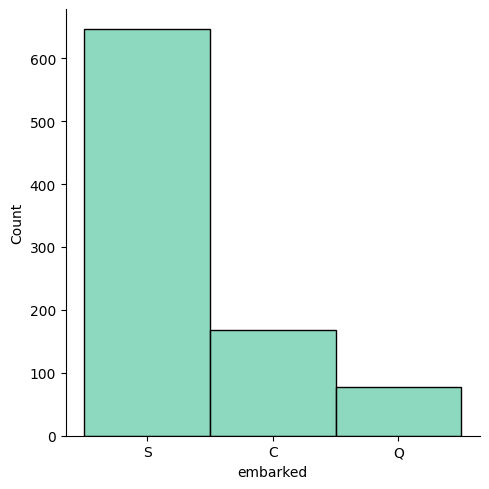

In [62]:
custom_palette = [ "#66CDAA"]
sns.set_palette(custom_palette)
sns.displot(data=data, x="embarked")

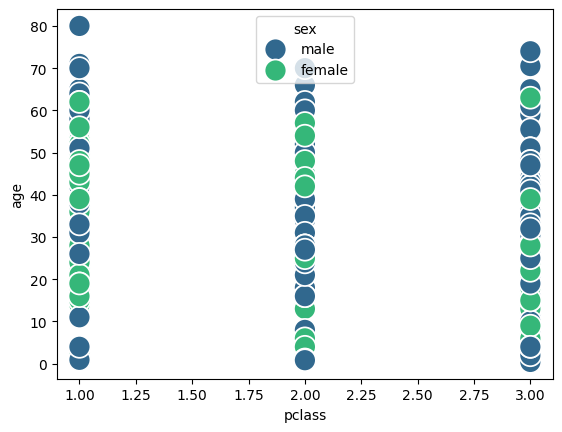

In [63]:
sns.scatterplot(data=data, x="pclass",y="age", hue="sex", palette="viridis",s=250)
plt.show()

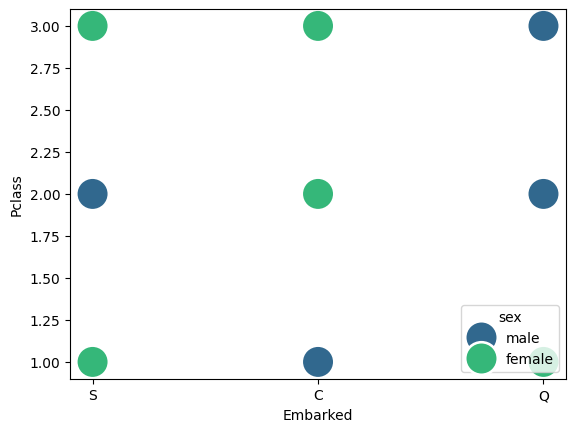

In [64]:
sns.scatterplot(data=data, x="embarked",y="pclass", hue="sex", palette="viridis",s=550)
plt.xlabel('Embarked')
plt.ylabel('Pclass')
plt.show()

In [65]:
# Drop unuseful columns if they exist:
columns_to_drop = ["Name","PassengerId"]
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
if existing_columns_to_drop:
    data.drop(columns=existing_columns_to_drop, axis=1, inplace=True)

In [66]:
data.cabin.isna().sum()

np.int64(687)

In [67]:
# Drop Columns with big amount of missed data and null values
columns_to_drop = ["Cabin"]
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
if existing_columns_to_drop:
    data.drop(columns=existing_columns_to_drop, axis=1, inplace=True)

In [68]:
# Fill the missed data with the mean in the age column
data["age"] = data["age"].fillna(np.mean(data["age"]))

In [69]:
# Drop the records with missed data ; because there are only 2 records
data=data.dropna()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  204 non-null    int64  
 1   survived     204 non-null    int64  
 2   pclass       204 non-null    int64  
 3   name         204 non-null    object 
 4   sex          204 non-null    object 
 5   age          204 non-null    float64
 6   sibsp        204 non-null    int64  
 7   parch        204 non-null    int64  
 8   ticket       204 non-null    object 
 9   fare         204 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     204 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.7+ KB


In [71]:
# To know every column will be encoded and how will be encoded
columns = [col for col in data.columns if data[col].dtype == 'object']

for col in columns:
    print("\n",data[col].value_counts(),"\n")


 name
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
McCarthy, Mr. Timothy J                                1
Sandstrom, Miss. Marguerite Rut                        1
Bonnell, Miss. Elizabeth                               1
                                                      ..
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1
Carlsson, Mr. Frans Olof                               1
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)          1
Graham, Miss. Margaret Edith                           1
Behr, Mr. Karl Howell                                  1
Name: count, Length: 204, dtype: int64 


 sex
male      107
female     97
Name: count, dtype: int64 


 ticket
19950       4
113760      4
110152      3
110413      3
17421       3
           ..
17466       1
PC 17590    1
695         1
112053      1
111369      1
Name: count, Length: 142, dtype: int64 


 cabin
G6             4
C23 C25 C27    4
B96 B98        4


In [72]:
# Drop Ticket column because it has many values so it will be so hard to encode each value with label
columns_to_drop = ["Ticket"]
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
if existing_columns_to_drop:
    data.drop(columns=existing_columns_to_drop, axis=1, inplace=True)

In [73]:
#Get dummies encoding
Get_Dumm=["Sex"]

for col in Get_Dumm :
    if col in data.columns:
        Encoded_with_getdummies=pd.get_dummies(data[col],drop_first=False,dtype="int")
        data=pd.concat([data,Encoded_with_getdummies],axis=1)
        data.drop(col,axis=1,inplace=True)

In [74]:
#Label Encoding
Label_categ=["embarked"]
for col in Label_categ :
    data[col]=LabelEncoder().fit_transform(data[col])

In [75]:
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,2
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,2


Scaling Numerical Data

In [76]:
# Create 'FamilySize' column
data['FamilySize'] = data['sibsp'] + data['parch'] + 1

# Drop non-numerical columns before scaling, including the original 'sex' and 'ticket'
data_for_scaling = data.drop(columns=['name', 'cabin', 'ticket'])

# Apply one-hot encoding to 'sex' and label encoding to 'embarked' within the data for scaling
data_for_scaling = pd.get_dummies(data_for_scaling, columns=['sex'], drop_first=False, dtype="int")
data_for_scaling['embarked'] = LabelEncoder().fit_transform(data_for_scaling['embarked'])


# Apply MinMaxScaler
Scaled_Data=MinMaxScaler().fit_transform(data_for_scaling)

In [77]:
Scaled_Data

array([[0.        , 1.        , 0.        , ..., 0.2       , 1.        ,
        0.        ],
       [0.00225225, 1.        , 0.        , ..., 0.2       , 1.        ,
        0.        ],
       [0.00563063, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.98873874, 1.        , 0.        , ..., 0.2       , 1.        ,
        0.        ],
       [0.99774775, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [78]:
Scaled_Data=pd.DataFrame(Scaled_Data, columns=data_for_scaling.columns)

In [79]:
Scaled_Data

,passengerid,survived,pclass,age,sibsp,parch,fare,embarked,FamilySize,sex_female,sex_male
0,0.000000,1.0,0.0,0.468892,0.333333,0.00,0.139136,0.0,0.2,1.0,0.0
1,0.002252,1.0,0.0,0.430956,0.333333,0.00,0.103644,1.0,0.2,1.0,0.0
2,0.005631,0.0,0.0,0.671219,0.000000,0.00,0.101229,1.0,0.0,0.0,1.0
3,0.010135,1.0,1.0,0.038948,0.333333,0.25,0.032596,1.0,0.4,1.0,0.0
4,0.011261,1.0,0.0,0.721801,0.000000,0.00,0.051822,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
199,0.979730,1.0,0.0,0.582701,0.333333,0.25,0.102579,1.0,0.4,1.0,0.0
200,0.980856,0.0,0.0,0.405665,0.000000,0.00,0.009759,1.0,0.0,0.0,1.0
201,0.988739,1.0,0.0,0.696510,0.000000,0.25,0.162314,0.0,0.2,1.0,0.0
202,0.997748,1.0,0.0,0.228629,0.000000,0.00,0.058556,1.0,0.0,1.0,0.0


In [80]:
Scaled_Data.columns=["passengerid","Survived","Pclass","Age","SibSp","Parch","Fare","Embarked","FamilySize","female","male"]

In [81]:
Scaled_Data

,passengerid,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,FamilySize,female,male
0,0.000000,1.0,0.0,0.468892,0.333333,0.00,0.139136,0.0,0.2,1.0,0.0
1,0.002252,1.0,0.0,0.430956,0.333333,0.00,0.103644,1.0,0.2,1.0,0.0
2,0.005631,0.0,0.0,0.671219,0.000000,0.00,0.101229,1.0,0.0,0.0,1.0
3,0.010135,1.0,1.0,0.038948,0.333333,0.25,0.032596,1.0,0.4,1.0,0.0
4,0.011261,1.0,0.0,0.721801,0.000000,0.00,0.051822,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
199,0.979730,1.0,0.0,0.582701,0.333333,0.25,0.102579,1.0,0.4,1.0,0.0
200,0.980856,0.0,0.0,0.405665,0.000000,0.00,0.009759,1.0,0.0,0.0,1.0
201,0.988739,1.0,0.0,0.696510,0.000000,0.25,0.162314,0.0,0.2,1.0,0.0
202,0.997748,1.0,0.0,0.228629,0.000000,0.00,0.058556,1.0,0.0,1.0,0.0


In [82]:
Features=Scaled_Data.drop(columns="Survived")
Goal=Scaled_Data["Survived"]

In [83]:
Features_train,Features_test,Goal_train,Goal_test=train_test_split(Features,Goal,test_size=0.1,random_state=0)

In [84]:
LR_params={"penalty":['l1', 'l2','elasticnet', 'None'],
           "dual":[True,False],
           "tol":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5],
           "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

KNN_params={"n_neighbors":[3,4,5,6,7,8,9,10],
            "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
            "weights":["uniform","distance"],
            "leaf_size":[10,20,30,40,50]}

DTC_params={"max_leaf_nodes":[1,3,4,5,7,8,"None"],
            "random_state":[0,10,15,30,40,42,44,46,50,60],
            'max_depth' : [3,5,7,10],
            'criterion': ['gini', 'entropy']}

RFC_params={"n_estimators":[100,120,160,200,240],
            "criterion":['gini', 'entropy', 'log_loss'],
            "max_features":["sqrt","log2","None"],
            "bootstrap":[True,False]}

## Applying Grid Search on Logistic Regression model :

In [85]:
LR=LogisticRegression()
GRS = GridSearchCV(LR, LR_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'dual': False, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
0.7918918918918919


In [86]:
LR=LogisticRegression(dual=False,penalty="l2",solver="saga",tol=0.1)
LR.fit(Features_train,Goal_train)
LR_Pred=LR.predict(Features_test)
LR_Pred_Train=LR.predict(Features_train)

In [87]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,LR_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,LR_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.44      0.57      0.50         7
         1.0       0.75      0.64      0.69        14

    accuracy                           0.62        21
   macro avg       0.60      0.61      0.60        21
weighted avg       0.65      0.62      0.63        21
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.66      0.75      0.70        61
         1.0       0.87      0.80      0.83       122

    accuracy                           0.79       183
   macro avg       0.76      0.78      0.77       183
weighted avg       0.80      0.79      0.79       183
 




[[4 3]
 [5 9]]


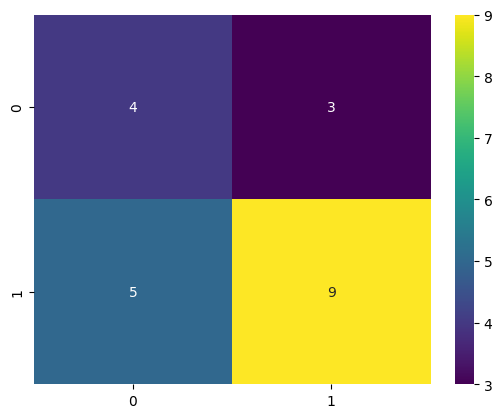

In [88]:
CM_RFC=confusion_matrix(Goal_test,LR_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()

Applying Grid search on KNN model

In [89]:
KNN=KNeighborsClassifier()
GRS = GridSearchCV(KNN, KNN_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 8, 'weights': 'uniform'}
0.7972972972972974


In [90]:
KNN=KNeighborsClassifier(algorithm="auto",leaf_size=10,n_neighbors=8,weights="uniform")
KNN.fit(Features_train,Goal_train)
KNN_Pred=KNN.predict(Features_test)
KNN_Pred_Train=KNN.predict(Features_train)

In [91]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,KNN_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,KNN_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.38      0.43      0.40         7
         1.0       0.69      0.64      0.67        14

    accuracy                           0.57        21
   macro avg       0.53      0.54      0.53        21
weighted avg       0.59      0.57      0.58        21
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76        61
         1.0       0.91      0.82      0.86       122

    accuracy                           0.83       183
   macro avg       0.80      0.83      0.81       183
weighted avg       0.84      0.83      0.83       183
 




In [92]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,KNN_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,KNN_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.38      0.43      0.40         7
         1.0       0.69      0.64      0.67        14

    accuracy                           0.57        21
   macro avg       0.53      0.54      0.53        21
weighted avg       0.59      0.57      0.58        21
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76        61
         1.0       0.91      0.82      0.86       122

    accuracy                           0.83       183
   macro avg       0.80      0.83      0.81       183
weighted avg       0.84      0.83      0.83       183
 




[[3 4]
 [5 9]]


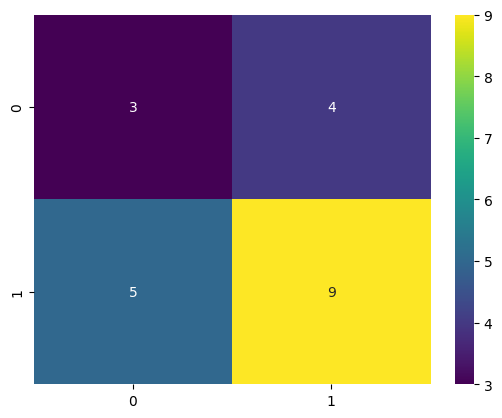

In [93]:
CM_KNN=confusion_matrix(Goal_test,KNN_Pred)
print(CM_KNN)
sns.heatmap(CM_KNN,annot=True,cmap="viridis")
plt.show()

Applying Grid Search on Decision Tree Model

In [94]:
DTC=DecisionTreeClassifier()
GRS = GridSearchCV(DTC, DTC_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 8, 'random_state': 0}
0.7701201201201202


In [95]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2)
DTC.fit(Features_train, Goal_train)
DTC_Pred = DTC.predict(Features_test)
DTC_Pred_Train = DTC.predict(Features_train)


In [96]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,DTC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,DTC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.43      0.43      0.43         7
         1.0       0.71      0.71      0.71        14

    accuracy                           0.62        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.62      0.62      0.62        21
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79        61
         1.0       0.93      0.83      0.87       122

    accuracy                           0.84       183
   macro avg       0.82      0.85      0.83       183
weighted avg       0.86      0.84      0.84       183
 




[[ 3  4]
 [ 4 10]]


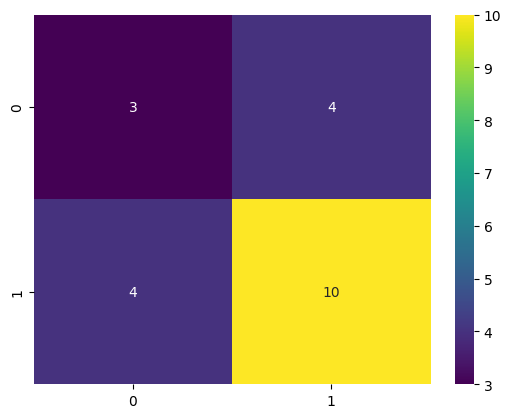

In [97]:
CM_DTC=confusion_matrix(Goal_test,DTC_Pred)
print(CM_DTC)
sns.heatmap(CM_DTC,annot=True,cmap="viridis")
plt.show()

Applying Search on Random Forest Model

In [98]:
RFC=RandomForestClassifier()
GRS = GridSearchCV(RFC, RFC_params, cv = 5)
GRS.fit(Features_train, Goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 120}
0.786936936936937


In [99]:
RFC=RandomForestClassifier(bootstrap= True,class_weight='balanced_subsample', criterion="log_loss" ,max_features="log2",n_estimators= 120)
RFC.fit(Features_train,Goal_train)
RFC_Pred=RFC.predict(Features_test)
RFC_Pred_Train=RFC.predict(Features_train)

In [100]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,RFC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,RFC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.50      0.57      0.53         7
         1.0       0.77      0.71      0.74        14

    accuracy                           0.67        21
   macro avg       0.63      0.64      0.64        21
weighted avg       0.68      0.67      0.67        21
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        61
         1.0       1.00      1.00      1.00       122

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183
 




[[ 4  3]
 [ 4 10]]


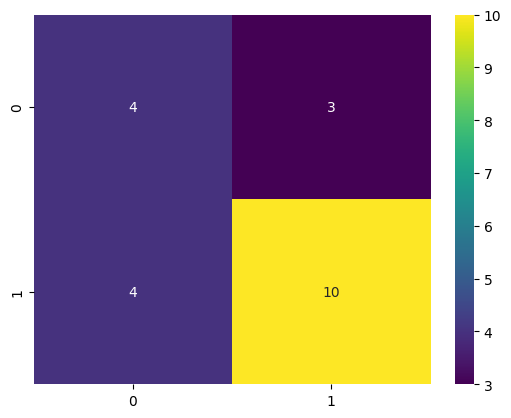

In [101]:
CM_RFC=confusion_matrix(Goal_test,RFC_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()

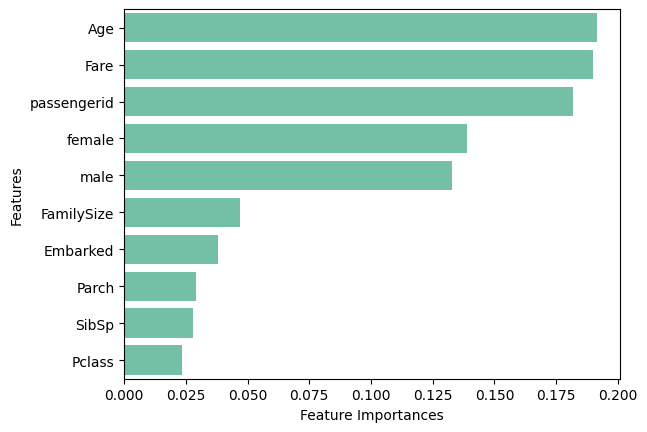

In [102]:
feature_scores = pd.Series(RFC.feature_importances_,
                          index = Features_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

In [103]:
Ftrain_RFC=Features_train.drop(columns=["Embarked","Parch"],axis=1)
RFC_ii=RandomForestClassifier()

In [104]:
RFC_Params = {
  "n_estimators":[50,100,200,300,400,500,600,700,800],
  "criterion":["gini","entropy", "log_loss"],
  "bootstrap":[True,False],
  "class_weight":["balanced","balanced_subsample"],
  "max_features":["sqrt","log2","None"]}

In [105]:
GRS=GridSearchCV(RFC,RFC_Params)

In [106]:
Ftest_RFC=Features_test.drop(columns=["Embarked","Parch"],axis=1)
Ftrain_RFC=Features_train.drop(columns=["Embarked","Parch"],axis=1)
RFC_ii=RandomForestClassifier(bootstrap= True,class_weight='balanced', criterion="gini" ,max_features="sqrt",n_estimators= 50)
RFC_ii.fit(Ftrain_RFC,Goal_train)
RFC_Pred=RFC_ii.predict(Ftest_RFC)
RFC_Pred_Train=RFC_ii.predict(Ftrain_RFC)

In [107]:
print("Classification Report for the test group : \n")
print(classification_report(Goal_test,RFC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Goal_train,RFC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.56      0.71      0.62         7
         1.0       0.83      0.71      0.77        14

    accuracy                           0.71        21
   macro avg       0.69      0.71      0.70        21
weighted avg       0.74      0.71      0.72        21
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        61
         1.0       1.00      1.00      1.00       122

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183
 




[[ 5  2]
 [ 4 10]]


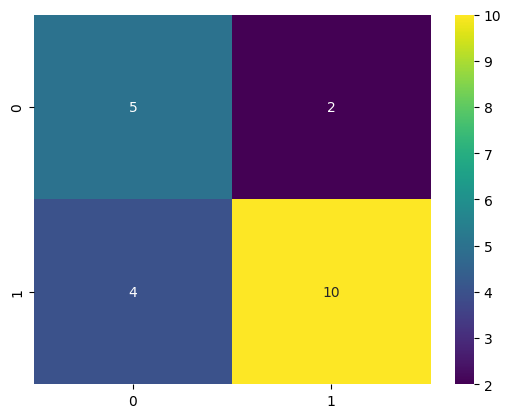

In [108]:
CM_RFC=confusion_matrix(Goal_test,RFC_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()

Choosing Final Model

In [109]:
data.to_csv("Encoded_titanic_data.csv")
Scaled_Data.to_csv("Scaled_titanic_data.csv")

In [110]:
joblib.dump(RFC,"Titanic Classifier Model (IEE Task).sav")

['Titanic Classifier Model (IEE Task).sav']

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
data=pd.read_csv("/content/Titanic-Dataset.csv")

In [113]:
data=pd.read_csv("/content/Titanic-Dataset.csv")

In [114]:
# Fill missing numerical columns with median
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Fill missing categorical columns with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [115]:
data=pd.read_csv("/content/Titanic-Dataset.csv")

In [116]:
# Fill missing numerical columns with median
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Fill missing categorical columns with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

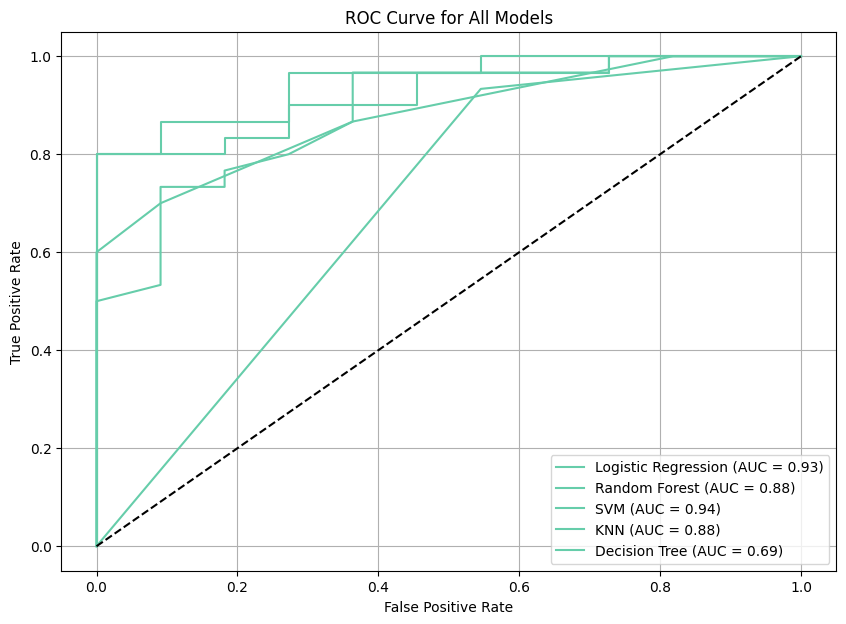

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Example: Split your features and target
# X = df.drop('Survived', axis=1)
# y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(Features, Goal, test_size=0.2, random_state=42)

# Define classifiers (with probability output)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and store ROC values
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Grid And Random Search for Logistic Regression

In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)

# Grid Search
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_log = GridSearchCV(log_model, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
print("Logistic Regression GridSearch Best Params:", grid_log.best_params_)

# Random Search
param_dist_log = {
    'C': uniform(0.01, 10),
    'solver': ['liblinear', 'lbfgs']
}
random_log = RandomizedSearchCV(log_model, param_distributions=param_dist_log, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_log.fit(X_train, y_train)
print("Logistic Regression RandomSearch Best Params:", random_log.best_params_)


Logistic Regression GridSearch Best Params: {'C': 1, 'solver': 'lbfgs'}
Logistic Regression RandomSearch Best Params: {'C': np.float64(0.5741157902710026), 'solver': 'lbfgs'}


For Randdom Forest

In [119]:
# Random Forest
rf_model = RandomForestClassifier()

# Grid Search
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Random Forest GridSearch Best Params:", grid_rf.best_params_)

# Random Search
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
random_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_rf.fit(X_train, y_train)
print("Random Forest RandomSearch Best Params:", random_rf.best_params_)


Random Forest GridSearch Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest RandomSearch Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}


SVM

In [120]:
# SVM (with probability=True)
svm_model = SVC(probability=True)

# Grid Search
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("SVM GridSearch Best Params:", grid_svm.best_params_)

# Random Search
param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf']
}
random_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_svm.fit(X_train, y_train)
print("SVM RandomSearch Best Params:", random_svm.best_params_)


SVM GridSearch Best Params: {'C': 0.1, 'kernel': 'linear'}
SVM RandomSearch Best Params: {'C': np.float64(1.934347898661638), 'kernel': 'rbf'}


KNN

In [121]:
# KNN
knn_model = KNeighborsClassifier()

# Grid Search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("KNN GridSearch Best Params:", grid_knn.best_params_)

# Random Search
param_dist_knn = {
    'n_neighbors': np.arange(3, 15),
    'weights': ['uniform', 'distance']
}
random_knn = RandomizedSearchCV(knn_model, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_knn.fit(X_train, y_train)
print("KNN RandomSearch Best Params:", random_knn.best_params_)


KNN GridSearch Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
KNN RandomSearch Best Params: {'weights': 'uniform', 'n_neighbors': np.int64(12)}


Decision Tree

In [122]:
# Decision Tree
tree_model = DecisionTreeClassifier()

# Grid Search
param_grid_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
print("Decision Tree GridSearch Best Params:", grid_tree.best_params_)

# Random Search
param_dist_tree = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}
random_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_tree.fit(X_train, y_train)
print("Decision Tree RandomSearch Best Params:", random_tree.best_params_)


Decision Tree GridSearch Best Params: {'max_depth': None, 'min_samples_split': 2}
Decision Tree RandomSearch Best Params: {'min_samples_split': 5, 'max_depth': None}


Best Model

--- Random Forest (Tuned) ---
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.55      0.67        11
         1.0       0.85      0.97      0.91        30

    accuracy                           0.85        41
   macro avg       0.86      0.76      0.79        41
weighted avg       0.85      0.85      0.84        41



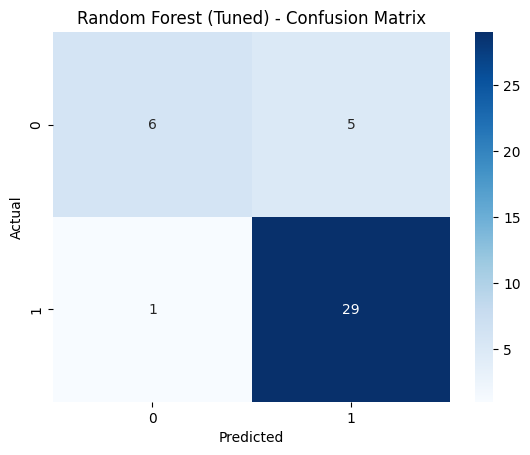

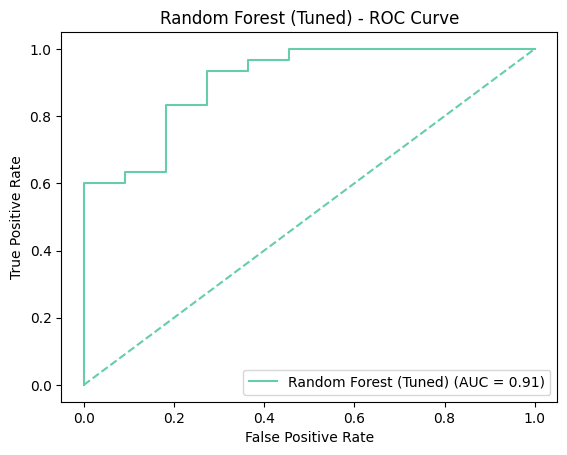

In [123]:
best_rf = grid_rf.best_estimator_
evaluate_model(best_rf, X_test, y_test, model_name="Random Forest (Tuned)")
